In [1]:
import os
import pandas as pd
%matplotlib inline
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/anna/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Read your api key environment variable
api_key = os.getenv("newsapikey")

In [4]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Set start and end datetimes of for 30 days allowed access to articles
from datetime import datetime, timedelta
end_date = datetime.now()
start_date = end_date + timedelta(-30)

In [6]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(
    from_param=start_date,
    to=end_date,
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)
# Print number articles found for reference
print(f"Total articles related to Bitcoin: {btc_news['totalResults']}")

Total articles related to Bitcoin: 3431


In [7]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(
    from_param=start_date,
    to=end_date,
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)
# Print number articles found for reference 
print(f"Total articles related to Ethereum: {eth_news['totalResults']}")

Total articles related to Ethereum: 839


In [8]:
# Create the Bitcoin sentiment scores DataFrame
#bitcoin sentiment list to dataframe
#sentiment_df=pd.DataFrame()
#sentiment_df.columns=["Compound","Negative","Neutral","Positive","text"]
btc_sentiment_list=[]
for article in btc_news["articles"]:        
   try: 
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        scores={"Compound":compound, "Negative":neg, "Neutral":neu, "Positive":pos, "text":text}
        btc_sentiment_list.append(scores)
        
   except: 
        pass

btc_sentiment_df=pd.DataFrame(btc_sentiment_list)
btc_sentiment_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.7650,0.000,0.829,0.171,J.K. Rowling has been drinking a lot and you'd...
1,0.3182,0.000,0.933,0.067,"Yesterday, the prominent bitcoin investor Mich..."
2,0.2716,0.000,0.939,0.061,"Early next week, Bitcoin is about to experienc..."
3,0.0000,0.000,1.000,0.000,Over the last few weeks all eyes in the crypto...
4,-0.3464,0.134,0.819,0.046,If youre planning to do some protesting and yo...


In [9]:
# Create the ethereum sentiment scores DataFrame
eth_sentiment_list=[]
for article in eth_news["articles"]:        
   try: 
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        scores={"Compound":compound, "Negative":neg, "Neutral":neu, "Positive":pos, "text":text}
        eth_sentiment_list.append(scores)
        
   except: 
        pass

eth_sentiment_df=pd.DataFrame(eth_sentiment_list)
eth_sentiment_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.0000,0.000,1.000,0.000,Editors note:Andreessen Horowitzs Crypto Start...
1,0.0000,0.000,1.000,0.000,For developers looking to quickly build identi...
2,0.6249,0.000,0.859,0.141,Use this to send Ether from one account to ano...
3,-0.4457,0.086,0.882,0.031,"Some open-source groups, such as The Linux Fou..."
4,0.0000,0.148,0.703,0.148,With unemployment surging and businesses strug...


In [10]:
# Describe the Bitcoin Sentiment
btc_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,89.000000,89.000000,89.000000,89.000000
mean,0.151879,0.042056,0.885191,0.072775
std,0.446432,0.064066,0.081959,0.071963
min,-0.848100,0.000000,0.629000,0.000000
25%,-0.226300,0.000000,0.831000,0.000000
50%,0.273200,0.000000,0.910000,0.070000
75%,0.507000,0.070000,0.933000,0.090000
max,0.919800,0.244000,1.000000,0.335000


In [11]:
# Describe the Ethereum Sentiment
eth_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,96.000000,96.000000,96.000000,96.000000
mean,0.269281,0.027260,0.882719,0.090010
std,0.361405,0.046592,0.084615,0.074059
min,-0.807400,0.000000,0.665000,0.000000
25%,0.000000,0.000000,0.822250,0.000000
50%,0.307100,0.000000,0.878500,0.101500
75%,0.592525,0.056000,0.946000,0.130000
max,0.919800,0.223000,1.000000,0.335000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum has the highest mean positive score of 0.081, but Bitcoin was really close for positive sentiment mean at 0.075.

Q: Which coin had the highest compound score?

A: Both coins had a max compound score of 0.92.

Q. Which coin had the highest positive score?

A: Both coins had a max positive score of 0.34.

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
# Expand the default stopwords list if necessary
stop_words=set(stopwords.words('english'))

In [14]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/anna/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
# Complete the tokenizer function
def tokenizer(sentiment_data):
   # """Tokenizes text."""
    tokens_list=[] 
    for row in sentiment_data['text']: 
        text_block=row
        sentence_tokenized=sent_tokenize(text_block)
        # Create a list of the words
        tokenized_words=[word_tokenize(sentence) for sentence in sentence_tokenized]

        # Convert the words to lowercase
        first_result=[word.lower() for word in tokenized_words[0] if word.lower() not in stop_words]
        #print(first_result)

        # Remove the punctuation
        second_result= [word for word in first_result if word.isalnum()]

        # Remove the stop words
        third_result= [word for word in second_result if not word in stop_words]

        # Lemmatize Words into root words
        # Instantiate the lemmatizer
        lemmatizer = WordNetLemmatizer()
        lem_words=[lemmatizer.lemmatize(word) for word in third_result]

        tokens={"token":lem_words}
        tokens_list.append(tokens)  
        
    return tokens_list

In [16]:
btc_tokens=tokenizer(btc_sentiment_df)
btc_tokens[0]

{'token': ['rowling',
  'drinking',
  'lot',
  'better',
  'believe',
  'thought',
  'bitcoin']}

In [17]:
# Create a new tokens column for bitcoin
from pandas import DataFrame
btc_tokens_df=pd.DataFrame(btc_tokens)
btc_tokens_df.head()

,token
0,"[rowling, drinking, lot, better, believe, thou..."
1,"[yesterday, prominent, bitcoin, investor, mich..."
2,"[early, next, week, bitcoin, experience, halvi..."
3,"[last, week, eye, crypto, world, glued, halven..."
4,"[youre, planning, protesting, dont, want, risk..."


In [18]:
# Create a new tokens column for bitcoin and join to bitcoin sentiment df
btc_sentiment_df=pd.concat([btc_sentiment_df,btc_tokens_df], axis=1, join="inner")
btc_sentiment_df.head()

,Compound,Negative,Neutral,Positive,text,token
0,0.7650,0.000,0.829,0.171,J.K. Rowling has been drinking a lot and you'd...,"[rowling, drinking, lot, better, believe, thou..."
1,0.3182,0.000,0.933,0.067,"Yesterday, the prominent bitcoin investor Mich...","[yesterday, prominent, bitcoin, investor, mich..."
2,0.2716,0.000,0.939,0.061,"Early next week, Bitcoin is about to experienc...","[early, next, week, bitcoin, experience, halvi..."
3,0.0000,0.000,1.000,0.000,Over the last few weeks all eyes in the crypto...,"[last, week, eye, crypto, world, glued, halven..."
4,-0.3464,0.134,0.819,0.046,If youre planning to do some protesting and yo...,"[youre, planning, protesting, dont, want, risk..."


In [19]:
eth_tokens=tokenizer(eth_sentiment_df)
eth_tokens[0]

{'token': ['editor',
  'note',
  'andreessen',
  'horowitz',
  'crypto',
  'startup',
  'school',
  'brought',
  'together',
  '45',
  'participant',
  'around',
  'overseas',
  'course',
  'learn',
  'build',
  'crypto',
  'company']}

In [20]:
# Create a new tokens column for bitcoin
from pandas import DataFrame
eth_tokens_df=pd.DataFrame(eth_tokens)
eth_tokens_df.head()

,token
0,"[editor, note, andreessen, horowitz, crypto, s..."
1,"[developer, looking, quickly, build, identity,..."
2,"[use, send, ether, one, account, another, smar..."
3,"[group, linux, foundation, deal]"
4,"[unemployment, surging, business, struggling, ..."


In [21]:
# Create a new tokens column for ethereum
eth_sentiment_df=pd.concat([eth_sentiment_df,eth_tokens_df], axis=1, join="inner")
eth_sentiment_df.head()

,Compound,Negative,Neutral,Positive,text,token
0,0.0000,0.000,1.000,0.000,Editors note:Andreessen Horowitzs Crypto Start...,"[editor, note, andreessen, horowitz, crypto, s..."
1,0.0000,0.000,1.000,0.000,For developers looking to quickly build identi...,"[developer, looking, quickly, build, identity,..."
2,0.6249,0.000,0.859,0.141,Use this to send Ether from one account to ano...,"[use, send, ether, one, account, another, smar..."
3,-0.4457,0.086,0.882,0.031,"Some open-source groups, such as The Linux Fou...","[group, linux, foundation, deal]"
4,0.0000,0.148,0.703,0.148,With unemployment surging and businesses strug...,"[unemployment, surging, business, struggling, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [22]:
from collections import Counter
from nltk import ngrams

In [23]:
btc_tokens[0]

{'token': ['rowling',
  'drinking',
  'lot',
  'better',
  'believe',
  'thought',
  'bitcoin']}

In [24]:
#trying to make list of dictionarys containing strings as values into one big string
#get list of all tokens as a single string for bitcoin articles
btc_big_token_list=[]
for dictionary in btc_tokens:
    btc_big_token_list.extend(dictionary['token'])
#get list of all tokens as a single string for ethereum articles
eth_big_token_list=[]
for dictionary in eth_tokens:
    eth_big_token_list.extend(dictionary['token'])

In [25]:
def ngram_count(token_list): 
    # Make all articles in the text to one single string
    bigrams = ngrams(token_list, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return list(top_10.items())

In [26]:
# Generate the Bitcoin N-grams where N=2
ngram_count(btc_big_token_list)

[(('bitcoin', 'btc'), 19),
 (('robot', 'colleague'), 16),
 (('colleague', 'satoshi'), 16),
 (('satoshi', 'nakaboto'), 16),
 (('nakaboto', 'writes'), 16),
 (('writes', 'bitcoin'), 16),
 (('every', 'fucking'), 16),
 (('fucking', 'day'), 16),
 (('btc', 'every'), 15),
 (('day', 'robot'), 11)]

In [27]:
# Generate the Ethereum N-grams where N=2
ngram_count(eth_big_token_list)

[(('day', 'ahead'), 18),
 (('ahead', 'ethereum'), 18),
 (('ethereum', 'would'), 18),
 (('would', 'need'), 18),
 (('level', 'bring'), 18),
 (('major', 'resistance'), 18),
 (('resistance', 'level'), 18),
 (('level', 'play'), 18),
 (('bring', 'first'), 17),
 (('first', 'major'), 17)]

In [28]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(token_list, N=10):
    """Returns the top N tokens from the frequency count"""
    # Combine all articles in corpus into one large string
    return Counter(token_list).most_common(N)

In [29]:
# Get the top 10 words for Bitcoin
btc_top10=token_count(btc_big_token_list,N=10)
btc_top10

[('bitcoin', 57),
 ('char', 21),
 ('btc', 20),
 ('every', 20),
 ('day', 18),
 ('satoshi', 18),
 ('robot', 16),
 ('colleague', 16),
 ('nakaboto', 16),
 ('writes', 16)]

In [30]:
# Get the top 10 words for Ethereum
eth_top10=token_count(eth_big_token_list,N=10)
eth_top10

[('ethereum', 42),
 ('level', 38),
 ('day', 20),
 ('major', 20),
 ('first', 19),
 ('need', 19),
 ('resistance', 19),
 ('play', 19),
 ('ahead', 19),
 ('would', 18)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

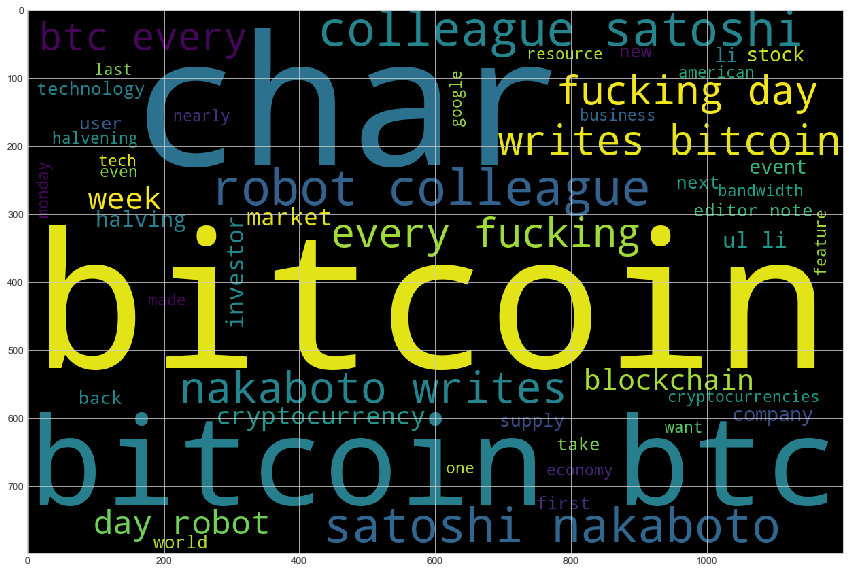

In [32]:
# Generate the Bitcoin word cloud
# put all the text together to get a string to look at for the word clound
input_text = ' '.join(btc_big_token_list)
btc_wc = WordCloud(width=1200, height=800, max_words=50).generate(input_text)
plt.imshow(btc_wc)


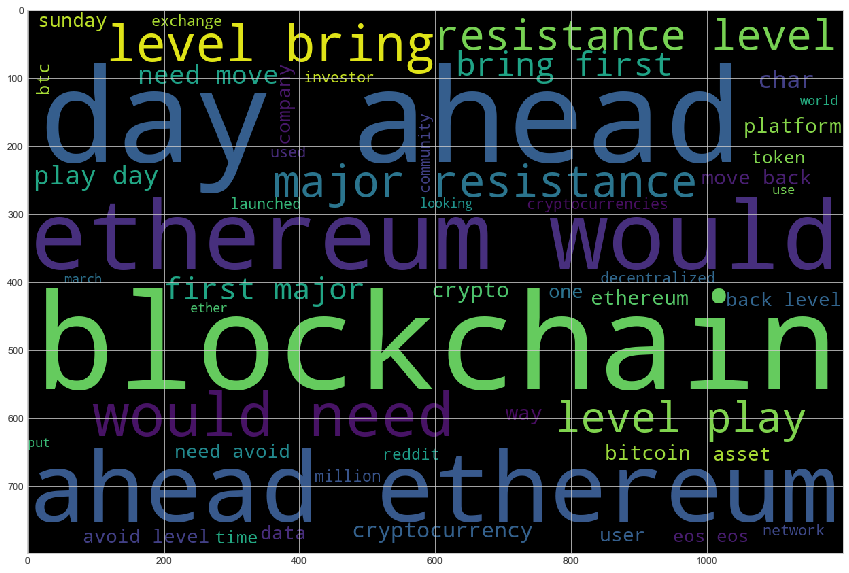

In [33]:
# Generate the Ethereum word cloud
input_text = ' '.join(eth_big_token_list)
eth_wc = WordCloud(width=1200, height=800, max_words=50).generate(input_text)
plt.imshow(eth_wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [34]:
import spacy
from spacy import displacy

In [35]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [36]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [37]:
# Concatenate all of the bitcoin text together
#make all text into one string

btc_big_list=[]
for row in btc_sentiment_df['text']:
    text=[row]
    btc_big_list.extend(text)

btc_big_string=' '.join(btc_big_list)

In [38]:
# Run the NER processor on all of the text
btc_text = nlp(btc_big_string)
# Add a title to the document
btc_text.user_data["title"] = "Bitcoin Text NER"
# Render the visualization
displacy.render(btc_text, style='ent')


In [39]:
# List all Entities
btc_ent=[ent.text for ent in btc_text.ents]
print(btc_ent)

['J.K. Rowling', 'Bitcoin', 'The Cuckoos Calling', 'Friday', 'Yesterday', 'Michael Terpin', 'SIM', '2018', 'Early next week', 'Bitcoin', 'third', 'the last few weeks', 'blockchain', 'new bitcoin', 'first', 'Bitcoin', '2009', 'three', '210,000', 'every four years', 'Bitcoin', '$13 billion', 'the past day', 'bitcoin', 'more than 6%', 'Thursday', 'Bitcoin', 'more than 100%', 'March 16', 'Reuters\r\n', 'Goldman Sachs', 'five', 'bitcoin', 'Wednesday', 'Goldman', 'Michael Novogratz', 'Monday', 'bitcoin', '$10,000 resistance', 'Novogratz', 'Satoshi Nakaboto', 'Bitcoin', 'Bitcoin', 'Today', 'Satoshi Nakaboto', 'Bitcoin', 'bitcoin', '2012', 'Satoshi Nakaboto', 'Bitcoin', 'Bitcoin', 'Today', 'Satoshi Nakaboto', 'Bitcoin', '2020', 'a big year', 'Bitcoin', 'Satoshi Nakaboto', 'Bitcoin', 'Bitcoin', 'Today', 'Satoshi Nakaboto', 'Bitcoin', 'Satoshi Nakaboto', 'Bitcoin', 'Bitcoin', 'Today', 'Satoshi Nakaboto', 'Bitcoin', 'Satoshi Nakaboto', 'Bitcoin', 'Bitcoin', 'Today', 'Satoshi Nakaboto', 'Bitcoin',

---

## Ethereum NER

In [40]:
# Concatenate all of the bitcoin text together
eth_big_list=[]
for row in eth_sentiment_df['text']:
    text=[row]
    eth_big_list.extend(text)

eth_big_string=' '.join(eth_big_list)

In [41]:
# Run the NER processor on all of the text
eth_text = nlp(eth_big_string)
# Add a title to the document
eth_text.user_data["title"] = "Ethereum Text NER"
# Render the visualization
displacy.render(eth_text, style='ent')

In [42]:
# List all Entities
eth_ent=[ent.text for ent in eth_text.ents]
print(eth_ent)

['Andreessen', 'Crypto Startup School', '45', 'U.S.', 'seven-week', 'Andreessen Ho', 'Ether', 'The Linux Foundation', 'Drupal Foundation', 'OSI', 'millions', 'Americans', '$2 trillion dollar', 'Relief', 'Ec', 'the last few weeks', 'blockchain', 'new bitcoin', 'crypto', 'Dapper', 'Libra', 'March', '1500', 'well over a hundred', 'the Mozilla Builders Incubator', '$13 billion', 'the past day', 'bitcoin', 'more than 6%', 'Thursday', 'Bitcoin', 'more than 100%', 'March 16', 'Blockchain', 'first', 'blockchain', '2020', 'a big year', 'Bitcoin', 'today', '27', 'Java', 'Federal Reserve Board', 'Jerome H. Powell', 'May 28, 2020', 'one', 'Japanese', 'Tuesday', 'Phoenix', 'Sunday night', '10,500,839', 'May 31', 'Bitcoin', 'Ether', 'DeFi', 'Canadian', 'SIM', 'Two', '2.4 million', 'the r/Cryptocurrency', 'un', 'Storj Labs', 'March', 'Tardigrade', 'QNAP', '2016', 'Crypto', 'The Proof of Stake Alliance', 'POSA', 'Capitol Hill', 'Bison Trails', 'Tezos', 'the Cardano Foundation', 'first', 'Vitalik Buter